<h1><center>Lab 2 </center></h1>

## Knapsack Problem
- $n$ objects, each has a value ($v$) and a weight ($w$)
- Objective: the knapsack to contain max value without exceeding max weight $W$
 - $x_i=1$ means object $i$ is selected
 - $x_i=0$ means object $j$ is not selected

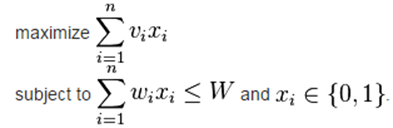


## WORK DURING THE LAB
1.	Implement the algorithm Random Hill-Climbing for the knapsack problem.
2.	Test the algorithm for different parameter settings. 

**Points for the work during the lab: 25p**


## Random HC (RHC)
 1. Choose a point in the search space at random. Call this point c. 
2. Choose a point x from the neighborhood of c: N(C). 
If eval(x) is better than eval(c) then c=x.
 3. Repeat step 2 until a maximum number of evaluations is reached. 
4. Return c.

In [97]:
import numpy as np

def load_data(file_name: str) -> "list[tuple[int, int]], int, int":
    weights_and_values = []
    with open(file_name) as f:
        lines = f.readlines()
        num_items = int(lines[0].strip())
        for line in lines[1:num_items + 1]:
            parts = line.split()
            weight, value = int(parts[1]), int(parts[2])
            weights_and_values.append((weight, value))
        capacity = int(lines[num_items + 1].strip())
    return weights_and_values, capacity, num_items

def generate_solution(n: int):
    """
        Generate solution of length n using binary encoding
        Input:
          n: int
        Output:
          sol: list
              - binary encoding solution
    """
    return np.random.randint(2, size=n).tolist()

def fitness(solution: list[int], data: list[tuple[int, int]], capacity: int) -> tuple[int, int]:
    """
    Fitness function to evaluate the solution for the knapsack problem by calculating the total weight and value of the solution
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        total weight, total value of solution
    """
    total_value = 0
    total_weight = 0
    
    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += data[i][1]
            total_weight+= data[i][0]
    
    return total_weight, total_value

def is_valid(solution: list[int], data: list[tuple[int, int]], capacity: int) -> bool:
    """
    Check if the solution is valid by checking if the total weight of the solution is less than the capacity
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        bool: True if the solution is valid, False otherwise
    """
    weight = fitness(solution, data, capacity)[0]
    
    return weight <= capacity

def generate_valid_sol(data: list[tuple[int, int]], capacity: int) -> list[int]:
    """
    Generate a valid solution by generating random solutions until a valid solution is found
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        list: a valid solution
    """
    while True:
        solution = generate_solution(len(data))
        if is_valid(solution, data, capacity):
            return solution
        
def get_neighbour(solution: list[int]) -> list[int]:
    """
    Get a neighbour of the solution by flipping a random bit
    Input:
        solution: list of 0s and 1s representing the inclusion of items
    Output:
        list: a neighbour of the solution
    """
    neighbour = solution.copy()
    index = np.random.randint(len(neighbour))
    if neighbour[index] == 0:
        neighbour[index] = 1
    else:
        neighbour[index] = 0
    
    return neighbour

def random_hilL_climbing(items : list[tuple[int,int]], capacity: int, nr_iterations: int):
    """
    Random Hill Climbing algorithm for the knapsack problem
    Input:
        items: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        nr_iterations: int, maximum number of iterations
    Output:
        best_solution: list of 0s and 1s representing the local optima found
        best_weight: int, total weight of the best solution
        best_value: int, total value of the best solution
    """
    
    # Step 1 - Generate a random solution c
    c = generate_valid_sol(items, capacity)
    curr_weight, curr_value = fitness(c, items, capacity)
    
    # Step 3 - Repeat step 2 until a maximum number of evaluations is reached
    for i in range(nr_iterations):
        
        # Step 2 - Get a neighbour 'x' of c
        x = get_neighbour(c)
        x_weight, x_value = fitness(x, items, capacity)
        
        if x_weight <= capacity:
            if x_value > curr_value:
                c = x
                curr_weight = x_weight
                curr_value = x_value
            elif x_value == curr_value and x_weight < curr_weight:
                c = x
                curr_weight = x_weight
                curr_value = x_value
        
    return c, curr_weight, curr_value

## Testing the algorithm for different parameter settings

In [98]:
# Test the algorithm for knapsack-20.txt
data, capacity, num_items = load_data("data/knapsack/knapsack-20.txt")
sol, weight, value = random_hilL_climbing(data, capacity, 1)

print ("Result for 1 iteration")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 10)
print("\nResult for 10 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 100)
print("\nResult for 100 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 1000)
print("\nResult for 1000 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 100000)
print("\nResult for 100000 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

Result for 1 iteration
Solution: [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
Weight: 355
Value: 382

Result for 10 iterations
Solution: [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]
Weight: 519
Value: 568

Result for 100 iterations
Solution: [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]
Weight: 519
Value: 522

Result for 1000 iterations
Solution: [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]
Weight: 509
Value: 476

Result for 100000 iterations
Solution: [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
Weight: 507
Value: 560


In [99]:
# Test the algorithm for rucsac-200.txt

data, capacity, num_items = load_data("data/knapsack/rucsac-200.txt")
sol, weight, value = random_hilL_climbing(data, capacity, 1)

print ("Result for 1 iteration")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 10)

print("\nResult for 10 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 100)
print("\nResult for 100 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 1000)
print("\nResult for 1000 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

sol, weight, value = random_hilL_climbing(data, capacity, 100000)
print("\nResult for 100000 iterations")
print(f"Solution: {sol}")
print(f"Weight: {weight}")
print(f"Value: {value}")

Result for 1 iteration
Solution: [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Weight: 107502
Value: 92102

Result for 10 iterations
Solution: [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1

## NEXT ASCENT HILL-CLIMBING (NAHC)
1. Choose a string at random. Call this string current−hilltop.
2. For i from 1 to l (where l is the length of the string), flip bit i; if this results in a fitness
increase, keep the new string, otherwise flip bit i; back. As soon as a fitness increase is
found, set current−hilltop to that increased−fitness string without evaluating any more bit
flips of the original string. Go to step 2 with the new current−hilltop, but continue mutating
the new string starting immediately after the bit position at which the previous fitness
increase was found.
3. If no increases in fitness were found, save current−hilltop and go to step 1.
4. When a set number of function evaluations has been performed, return the highest hilltop
that was found.

In [20]:
def next_ascent_hill_climbing(items : list[tuple[int,int]], capacity: int, iterations: int):
    """
    Next Ascent Hill Climbing algorithm for the knapsack problem
    Input:
        items: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        nr_iterations: int, maximum number of iterations
    Output:
        hilltop: list of 0s and 1s representing the local optima found
        best_weight: int, total weight of the best solution
        best_value: int, total value of the best solution
    """
    # Initialize the best solution
    curr_hilltop = None
    best_weight, best_value = 0, 0

    # Step 3 - Repeat step 2 until a maximum number of evaluations is reached
    for i in range(iterations):
        # Step1 - Generate a random solution
        c = generate_valid_sol(items, capacity)
        curr_weight, curr_value = fitness(c, items, capacity)
        pos = 0

        # Step 2 - For i from 1 to l (where l is the length of the string), flip bit i if this results in a fitness increase, keep the new string, otherwise flip bit i back.
        while True:
            improved = False
            l = len(c)
            for j in range(pos, l):
                neighbor = c.copy()
                neighbor[j] = 1 - neighbor[j]
                neighbor_weight, neighbor_value = fitness(neighbor, items, capacity)

                if neighbor_weight <= capacity and neighbor_value > curr_value:
                    c = neighbor
                    curr_weight, curr_value = neighbor_weight, neighbor_value
                    pos = j + 1
                    improved = True
                    break

            if not improved:
                break

        if curr_value > best_value:
            curr_hilltop = c
            best_value = curr_value
            best_weight = curr_weight

    return curr_hilltop, best_weight, best_value

## Functions to facilitate the testing and reporting of the results

In [101]:
import matplotlib.pyplot as plt

def plot_for_different_iterations(data, capacity, iterations):
    """
    Plot the results of the algorithm for different number of iterations
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        iterations: list of integers, number of iterations to test the algorithm on
    """
    values = []
    for it in iterations:
        _, _, value = next_ascent_hill_climbing(data, capacity, it)
        values.append(value)

    plt.plot(iterations, values, marker='o', color = 'b', label='Best value')
    plt.xlabel('Number of iterations')
    plt.ylabel('Total value')
    plt.title('Total value of the best solution found for different number of iterations')
    plt.grid(True)
    plt.show()


import time

def markdown_table(data, capacity, iterations):
    """
    Generate a markdown table with the results of the algorithm for different number of iterations
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        iterations: list of integers, number of iterations to test the algorithm on
    """
    print("| Iterations | Best value | Computation time (s) |")
    print("|------------|------------|----------------------|")
    for it in iterations:
        start_time = time.time()
        _, _, value = next_ascent_hill_climbing(data, capacity, it)
        end_time = time.time()
        computation_time = end_time - start_time
        print(f"| {it} | {value} | {computation_time:.4f} |")


def compute_percentage_of_best_solution(data, capacity, iterations):
    """
    Compute the percentage of the best solution found for different number of iterations
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        iterations: list of integers, number of iterations to test the algorithm on
    """
    best_value = 0
    all_values = {it: [] for it in iterations}

    # Run the algorithm 100 times for each iteration count
    for _ in range(100):
        for it in iterations:
            # Assuming next_ascent_hill_climbing is the function used to get the solution
            sol, weight, value = next_ascent_hill_climbing(data, capacity, it)
            all_values[it].append(value)
            if value > best_value:
                best_value = value

    percentages = {}
    # Compute the percentage of the best solution for each iteration count
    for it in iterations:
        best_count = sum(1 for value in all_values[it] if value == best_value)
        percentage = (best_count / 100) * 100
        percentages[it] = percentage
        print(f"{it} iterations: {percentage:.2f}% of runs achieved the best solution {best_value}")

    return percentages

def plot_percentages(data, capacity, iterations):
    """ 
    Plot the percentage of the best solution achieved for different number of iterations
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        iterations: list of integers, number of iterations to test the algorithm on
    """
    percentages = compute_percentage_of_best_solution(data, capacity, iterations)
    iteration_counts = list(percentages.keys())
    percentage_values = list(percentages.values())

    plt.figure(figsize=(10, 6))
    plt.plot(iteration_counts, percentage_values, marker='o', color = 'y')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Percentage of Best Solution Achieved')
    plt.title('Percentage of Best Solution Achieved vs. Number of Iterations')
    plt.grid(True)
    plt.show()

 

## Testing the algorithm for a knapsack problem with 20 items

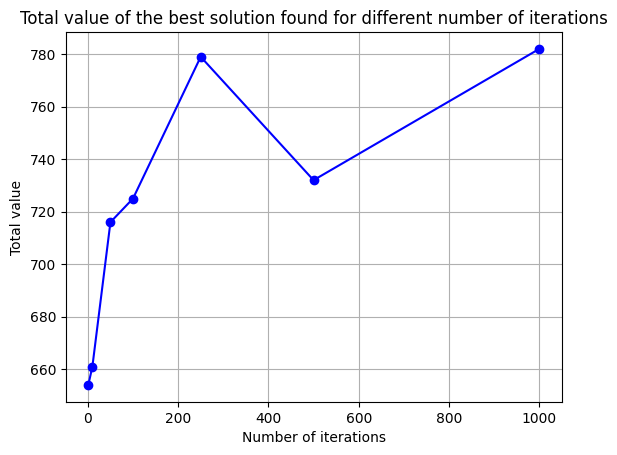

In [85]:
data, capacity, _ = load_data("data/knapsack/knapsack-20.txt")
iterations = [1, 10, 50, 100, 250, 500, 1000]

plot_for_different_iterations(data, capacity, iterations)


In [86]:
iterations = [10, 50, 100, 500, 1000, 5000, 10000, 100000]
markdown_table(data, capacity, iterations)

| Iterations | Best value | Computation time (s) |
|------------|------------|----------------------|
| 10 | 695 | 0.0000 |
| 50 | 724 | 0.0040 |
| 100 | 745 | 0.0060 |
| 500 | 732 | 0.0309 |
| 1000 | 776 | 0.0565 |
| 5000 | 779 | 0.2689 |
| 10000 | 787 | 0.6034 |
| 100000 | 787 | 5.9443 |


| Iterations | Best value | Computation time (s) |
|------------|------------|----------------------|
| 10 | 695 | 0.0000 |
| 50 | 724 | 0.0040 |
| 100 | 745 | 0.0060 |
| 500 | 732 | 0.0309 |
| 1000 | 776 | 0.0565 |
| 5000 | 779 | 0.2689 |
| 10000 | 787 | 0.6034 |
| 100000 | 787 | 5.9443 |

10 iterations: 0.00% of runs achieved the best solution 787
50 iterations: 0.00% of runs achieved the best solution 787
100 iterations: 0.00% of runs achieved the best solution 787
500 iterations: 5.00% of runs achieved the best solution 787
1000 iterations: 10.00% of runs achieved the best solution 787
5000 iterations: 40.00% of runs achieved the best solution 787
10000 iterations: 74.00% of runs achieved the best solution 787


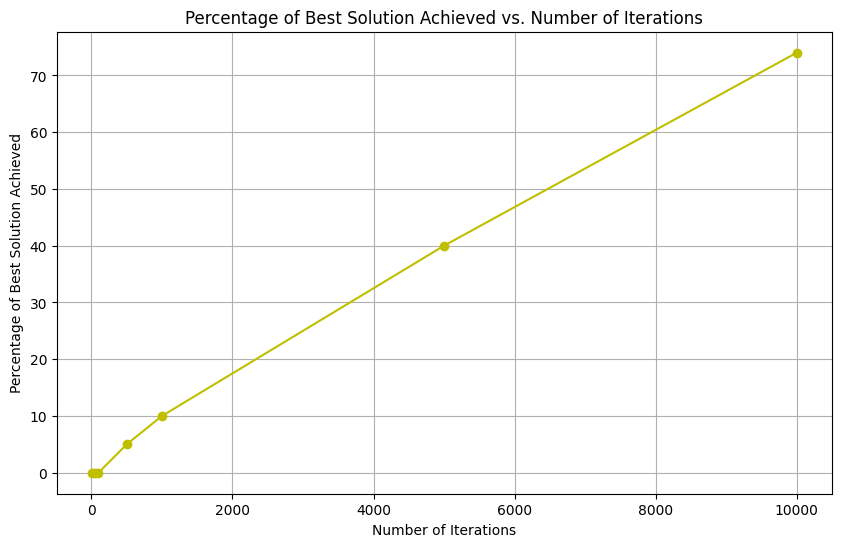

In [87]:
iterations = [10, 50, 100, 500, 1000, 5000, 10000]
plot_percentages(data, capacity, iterations)

# Results and conclusions

## Plot:
   - The plot shows that the best value increases with the number of iterations.
   - It grows exponentially at the beginning and then stabilizes at around 5000+ iterations.
## Table:
   - The table shows the best value and computation time for different numbers of iterations.
   - The best value increases with the number of iterations.
   - Computational time for a knapsack of 20 items is very low, even for a large number of iterations.
        - For this problem, going above 10000 iterations does not seem to be beneficial.
                
 ## Percentage of the best solution achieved:
 - For the data set, above 5000 iterations, the algorithm achieves the best solution about half of the time.
  - 10000 iterations almost guarantee a 100% success rate in finding the best solution.

### Observation 
The best value is not guaranteed to increase with the number of iterations. The algorithm may get stuck in a local optima.

## Testing the algorithm for a knapsack problem with 200 items

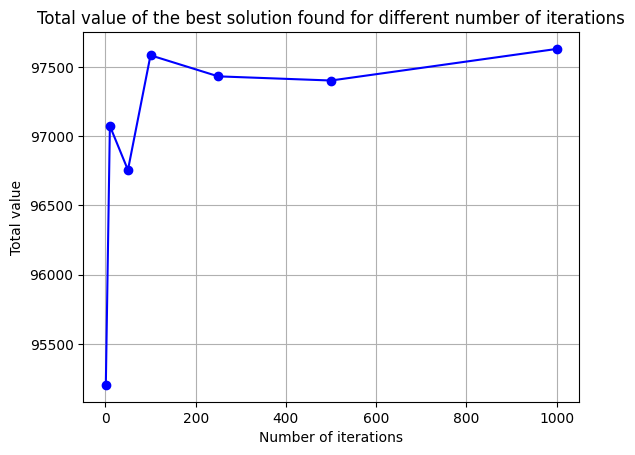

In [88]:
data, capacity, _ = load_data("data/knapsack/rucsac-200.txt")
iterations = [1, 10, 50, 100, 250, 500, 1000]

plot_for_different_iterations(data, capacity, iterations)

In [89]:
iterations = [10, 50, 100, 500, 1000, 5000, 10000]
markdown_table(data, capacity, iterations)

| Iterations | Best value | Computation time (s) |
|------------|------------|----------------------|
| 10 | 97139 | 0.0451 |
| 50 | 97052 | 0.1928 |
| 100 | 96932 | 0.3872 |
| 500 | 97240 | 2.5346 |
| 1000 | 97548 | 3.7098 |
| 5000 | 97635 | 18.2309 |
| 10000 | 97668 | 36.8326 |


| Iterations | Best value | Computation time (s) |
|------------|------------|----------------------|
| 10 | 97139 | 0.0451 |
| 50 | 97052 | 0.1928 |
| 100 | 96932 | 0.3872 |
| 500 | 97240 | 2.5346 |
| 1000 | 97548 | 3.7098 |
| 5000 | 97635 | 18.2309 |
| 10000 | 97668 | 36.8326 |

10 iterations: 0.00% of runs achieved the best solution 97976
50 iterations: 0.00% of runs achieved the best solution 97976
100 iterations: 0.00% of runs achieved the best solution 97976
500 iterations: 1.00% of runs achieved the best solution 97976


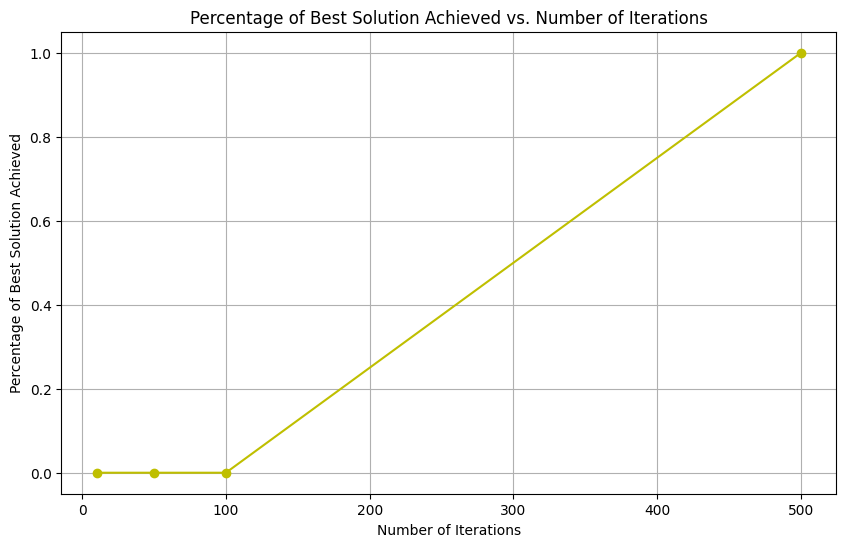

In [102]:
iterations = [10, 50, 100, 500]
plot_percentages(data, capacity, iterations)

# Results and conclusions
## Plot:
   - The plot shows that the best value increases with the number of iterations.
## Table:
   - Computation time for a knapsack of 200 items is higher than for a knapsack of 20 items.
   - The time to run increases drastically with the number of iterations.
   - A lot of resources are needed to run the algorithm for a large number of iterations.
## Percentage of the best solution achieved:
   - For a big dataset like this one (200 items), the algorithm does not often achieve the best solution with a small number of iterations and it is too time-consuming to run the algorithm for a large number of iterations.
   - Only around 1% of the runs achieve the best solution for 500 iterations.
### Observation
- The algorithm is not efficient for a large dataset like this one.
    

# Comparing RHC and NAHC
### Comparing the two algorithms using the knapsack-20.txt dataset.

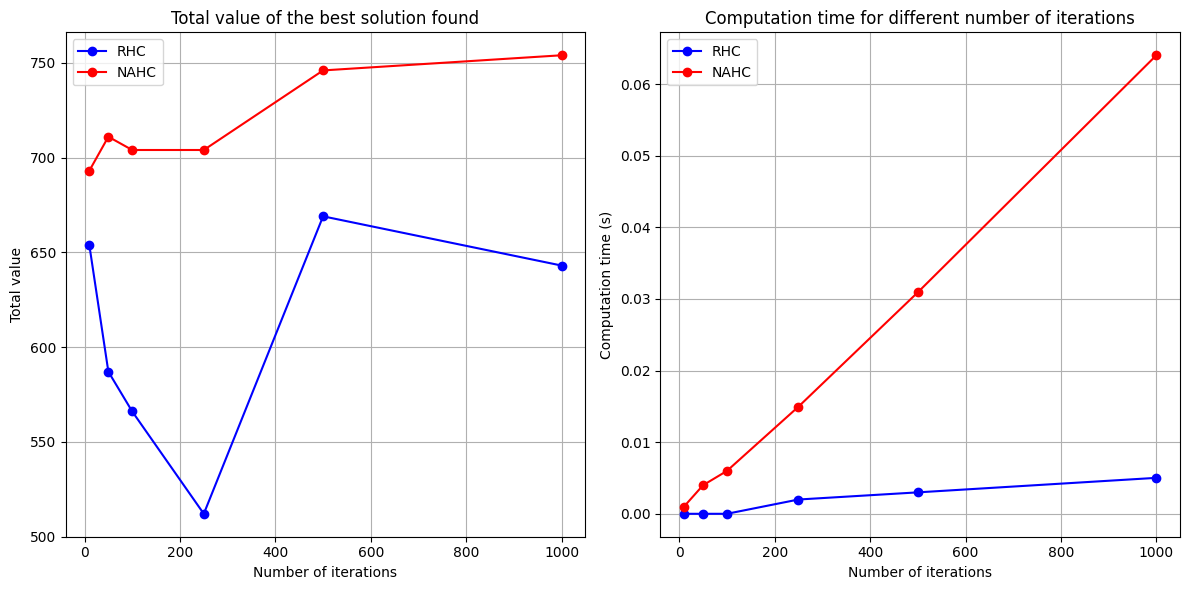

Iterations: 10, RHC Time: 0.0000s, NAHC Time: 0.0010s
Iterations: 50, RHC Time: 0.0000s, NAHC Time: 0.0040s
Iterations: 100, RHC Time: 0.0000s, NAHC Time: 0.0060s
Iterations: 250, RHC Time: 0.0020s, NAHC Time: 0.0150s
Iterations: 500, RHC Time: 0.0030s, NAHC Time: 0.0309s
Iterations: 1000, RHC Time: 0.0050s, NAHC Time: 0.0640s


In [94]:
import time 
def plot_compare_rhc_nahc(data, capacity, iterations):
    """
    Plot the results of the Random Hill Climbing and Next Ascent Hill Climbing algorithms for different number of iterations
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        iterations: list of integers, number of iterations to test the algorithms on
    """
    values_rhc = []
    values_nahc = []
    times_rhc = []
    times_nahc = []
    
    for it in iterations:
        start_time = time.time()
        _, _, value_rhc = random_hilL_climbing(data, capacity, it)
        end_time = time.time()
        times_rhc.append(end_time - start_time)
        values_rhc.append(value_rhc)
        
        start_time = time.time()
        _, _, value_nahc = next_ascent_hill_climbing(data, capacity, it)
        end_time = time.time()
        times_nahc.append(end_time - start_time)
        values_nahc.append(value_nahc)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(iterations, values_rhc, marker='o', color='b', label='RHC')
    plt.plot(iterations, values_nahc, marker='o', color='r', label='NAHC')
    plt.xlabel('Number of iterations')
    plt.ylabel('Total value')
    plt.title('Total value of the best solution found')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(iterations, times_rhc, marker='o', color='b', label='RHC')
    plt.plot(iterations, times_nahc, marker='o', color='r', label='NAHC')
    plt.xlabel('Number of iterations')
    plt.ylabel('Computation time (s)')
    plt.title('Computation time for different number of iterations')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    for it, time_rhc, time_nahc in zip(iterations, times_rhc, times_nahc):
        print(f"Iterations: {it}, RHC Time: {time_rhc:.4f}s, NAHC Time: {time_nahc:.4f}s")
        

data, capacity, _ = load_data("data/knapsack/knapsack-20.txt")
plot_compare_rhc_nahc(data, capacity, iterations)

### Comparing for the rucsac-200.txt dataset

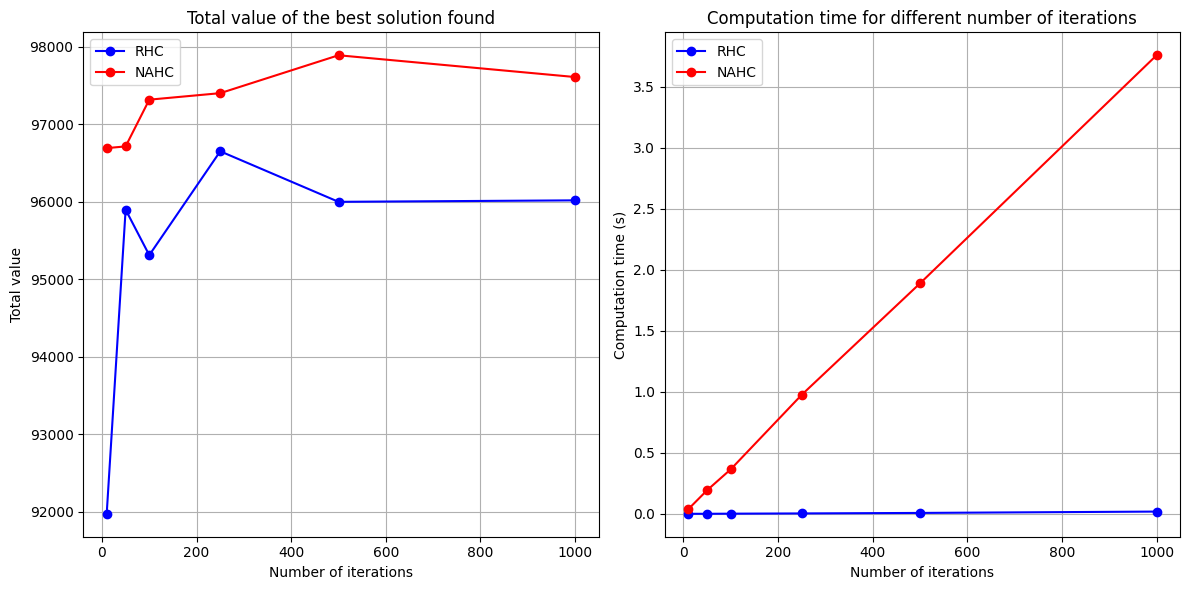

Iterations: 10, RHC Time: 0.0010s, NAHC Time: 0.0379s
Iterations: 50, RHC Time: 0.0010s, NAHC Time: 0.1941s
Iterations: 100, RHC Time: 0.0020s, NAHC Time: 0.3658s
Iterations: 250, RHC Time: 0.0040s, NAHC Time: 0.9761s
Iterations: 500, RHC Time: 0.0081s, NAHC Time: 1.8888s
Iterations: 1000, RHC Time: 0.0192s, NAHC Time: 3.7575s


In [96]:
data, capacity, _ = load_data("data/knapsack/rucsac-200.txt")
plot_compare_rhc_nahc(data, capacity, iterations)

## Conclusion
- The NAHC yields more promising results than the RHC.
- The results of NAHC may be better than RHC, but the computation time is higher.
- NAHC should be used when the best solution is needed, and the computation time is not a concern.
- RHC seems to be less consistent in finding the best solution, but it is faster.